In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns
from scipy import stats # importando scipy.stats

In [4]:
df = pd.read_csv('ds_salaries.csv', index_col = 0)
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo,
Percentiles 25, 75,
Rango Intercualtílico,
Boxplot de algunas variables,
Tabla de frecuencias,
Variables cualitativas,
Variables cuantitativas,
Frecuencia acumulada,
Representación de al menos una tabla de frecuencias


In [19]:
print('la media de cada columna es:','\n', round(df.mean(),2))

la media de cada columna es: 
 work_year          2021.41
salary           324000.06
salary_in_usd    112297.87
remote_ratio         70.92
dtype: float64


/tmp/ipykernel_16834/452655418.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('la media de cada columna es:','\n', round(df.mean(),2))


In [21]:
# mediana de cada columna nuemrica
print('la mediana de cada columna es:','\n', round(df.median(),2))

la mediana de cada columna es: 
 work_year          2022.0
salary           115000.0
salary_in_usd    101570.0
remote_ratio        100.0
dtype: float64


/tmp/ipykernel_16834/2275570869.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('la mediana de cada columna es:','\n', round(df.median(),2))


In [26]:
print('la moda de cada columna es:','\n', round(df.mode(),2))

la moda de cada columna es: 
    work_year experience_level employment_type       job_title  salary  \
0     2022.0               SE              FT  Data Scientist   80000   
1        NaN              NaN             NaN             NaN  100000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD       100000.0                 US         100.0   
1             NaN            NaN                NaN           NaN   

  company_location company_size  
0               US            M  
1              NaN          NaN  


In [36]:
print('el maximo de cada columna es:','\n', df.max(axis= 0, numeric_only= True))
print('--------------------')
print('el  minimo de cada columna es:','\n', df.min(axis = 0, numeric_only= True))

el maximo de cada columna es: 
 work_year            2022
salary           30400000
salary_in_usd      600000
remote_ratio          100
dtype: int64
--------------------
el  minimo de cada columna es: 
 work_year        2020
salary           4000
salary_in_usd    2859
remote_ratio        0
dtype: int64


In [47]:
#percentiles 25, 75
q3, q1 = np.percentile(df['salary'], [75, 25])
riq = q3 - q1
print("El rango intercuartílico es:", riq)

El rango intercuartílico es: 95000.0


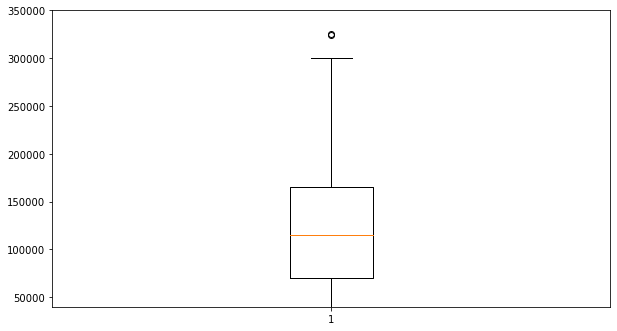

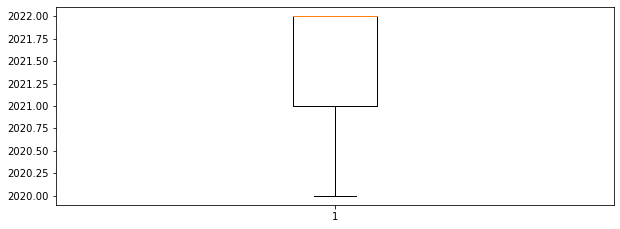

In [67]:
#boxplot de algunas variables

fig1 = plt.figure(1,figsize=(10,12))
fig2 = plt.figure(2,figsize=(10,8))
ax1 = fig1.add_subplot(2,1,1)
ax2 = fig2.add_subplot(2,1,2)

bp1 = ax1.boxplot(df['salary'])
bp2 = ax2.boxplot(df['work_year'])
ax1.set_ylim([40000, 350000])

plt.show()


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [56]:
#tabla de frecuencias
# Primero agrupamos el dataframe por la columna job_title
group_jobs = df.groupby("job_title") # Devolvera un objeto DataFrameGroupBy
print(group_jobs)

# Aplicamos el método agg para agregar los datos por la columa species
frecuencias_jobs = group_jobs.agg(frecuencia=("job_title", "count"))
 
# Imprimimos por pantalla el resultado de la agrupación y agregación
print(frecuencias_jobs)


                                          frecuencia
job_title                                           
3D Computer Vision Researcher                      1
AI Scientist                                       7
Analytics Engineer                                 4
Applied Data Scientist                             5
Applied Machine Learning Scientist                 4
BI Data Analyst                                    6
Big Data Architect                                 1
Big Data Engineer                                  8
Business Data Analyst                              5
Cloud Data Engineer                                2
Computer Vision Engineer                           6
Computer Vision Software Engineer                  3
Data Analyst                                      97
Data Analytics Engineer                            4
Data Analytics Lead                                1
Data Analytics Manager                             7
Data Architect                                

In [ ]:
#variables cualitativas

In [ ]:
#variables cuantitativas

In [ ]:
#frecuancias acumuladas

In [ ]:
#representacion de tabla frecuencias

2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.